<a href="https://colab.research.google.com/github/Trojans42/House-Prices/blob/master/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files #Upload Files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
Saving test.csv to test.csv
User uploaded file "train.csv" with length 460676 bytes
User uploaded file "test.csv" with length 451405 bytes


In [0]:
import io
import pandas as pd

df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
print(df_train.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [0]:
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
print(df_test.head())

     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [0]:
missing_count = (df_train.isnull().sum() / len(df_train)) * 100

missing_count = missing_count[missing_count > 0]

print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


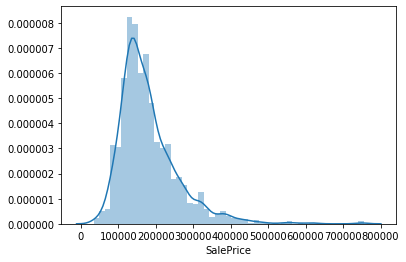

In [0]:
import seaborn as sns
sns.distplot(df_train['SalePrice'])

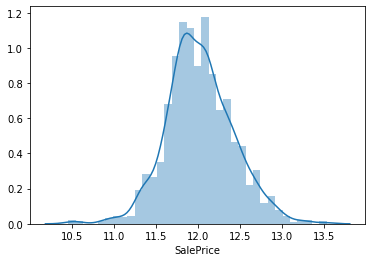

In [0]:
import numpy as np

target = np.log(df_train['SalePrice'])

sns.distplot(target)

In [0]:
numeric_data = df_train.select_dtypes(include = [np.number])

categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

There are 38 numerical and 43 categorical features in the training data


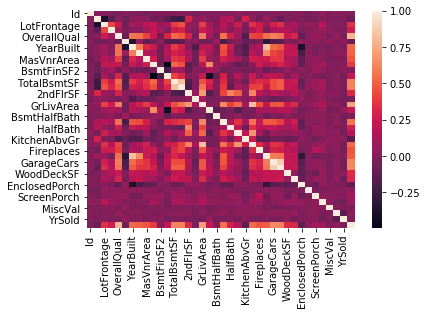

In [0]:
corr = numeric_data.corr()

sns.heatmap(corr)

In [0]:
del numeric_data['Id']

numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [0]:
from google.colab import files #Import files from Colab

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

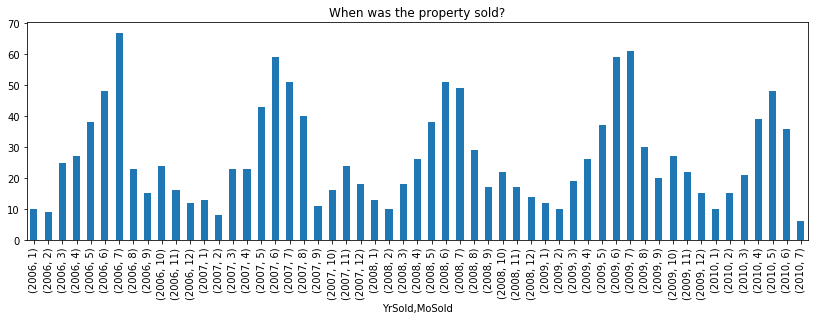

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When was the property sold?')
plt.show()

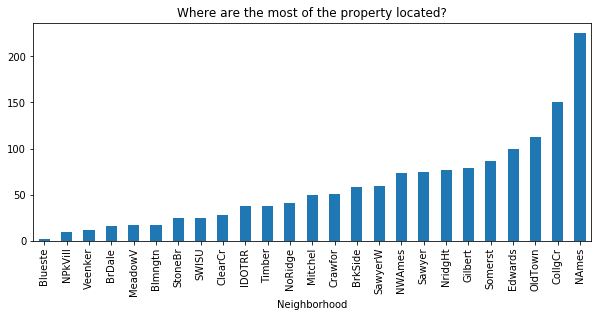

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

df_train.groupby('Neighborhood').Id.count().sort_values().plot(kind='bar', figsize=(10,4))
plt.title('Where are the most of the property located?')
plt.show()

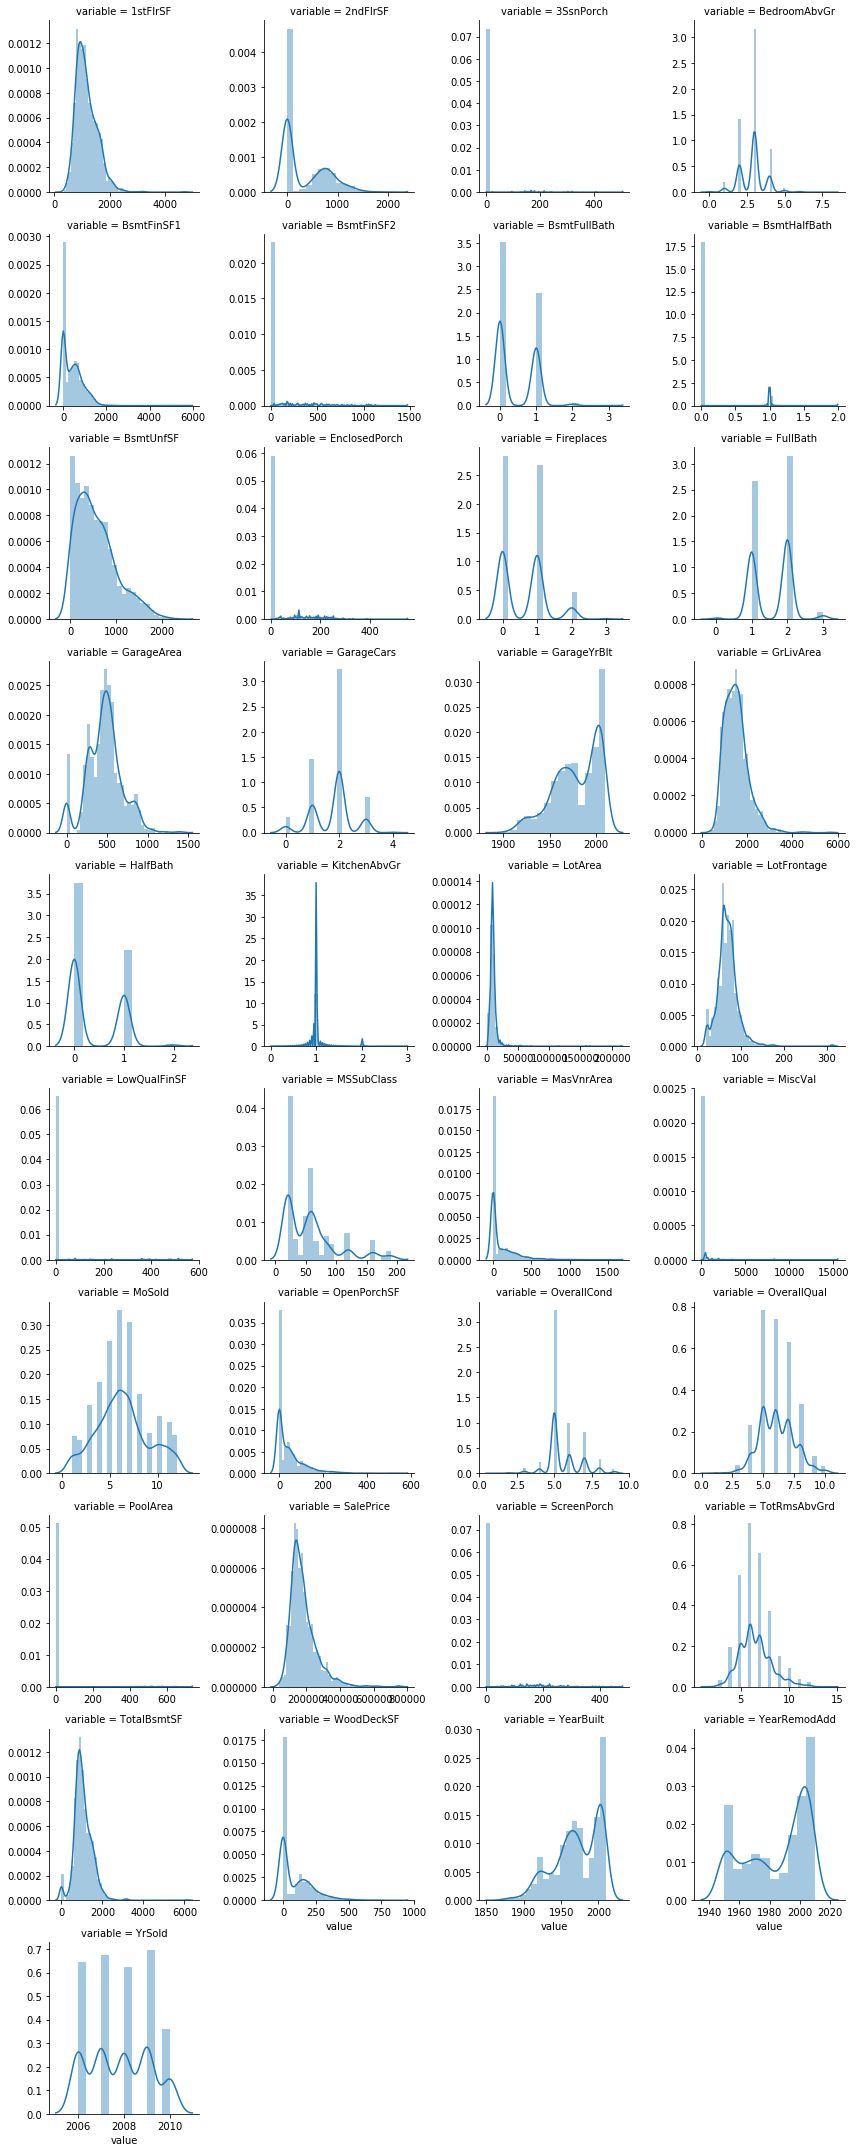

In [0]:
f = pd.melt(df_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [0]:
df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [0]:
numeric_data = df_train.select_dtypes(include = [np.number])

categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

There are 35 numerical and 46 categorical features in the training data


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


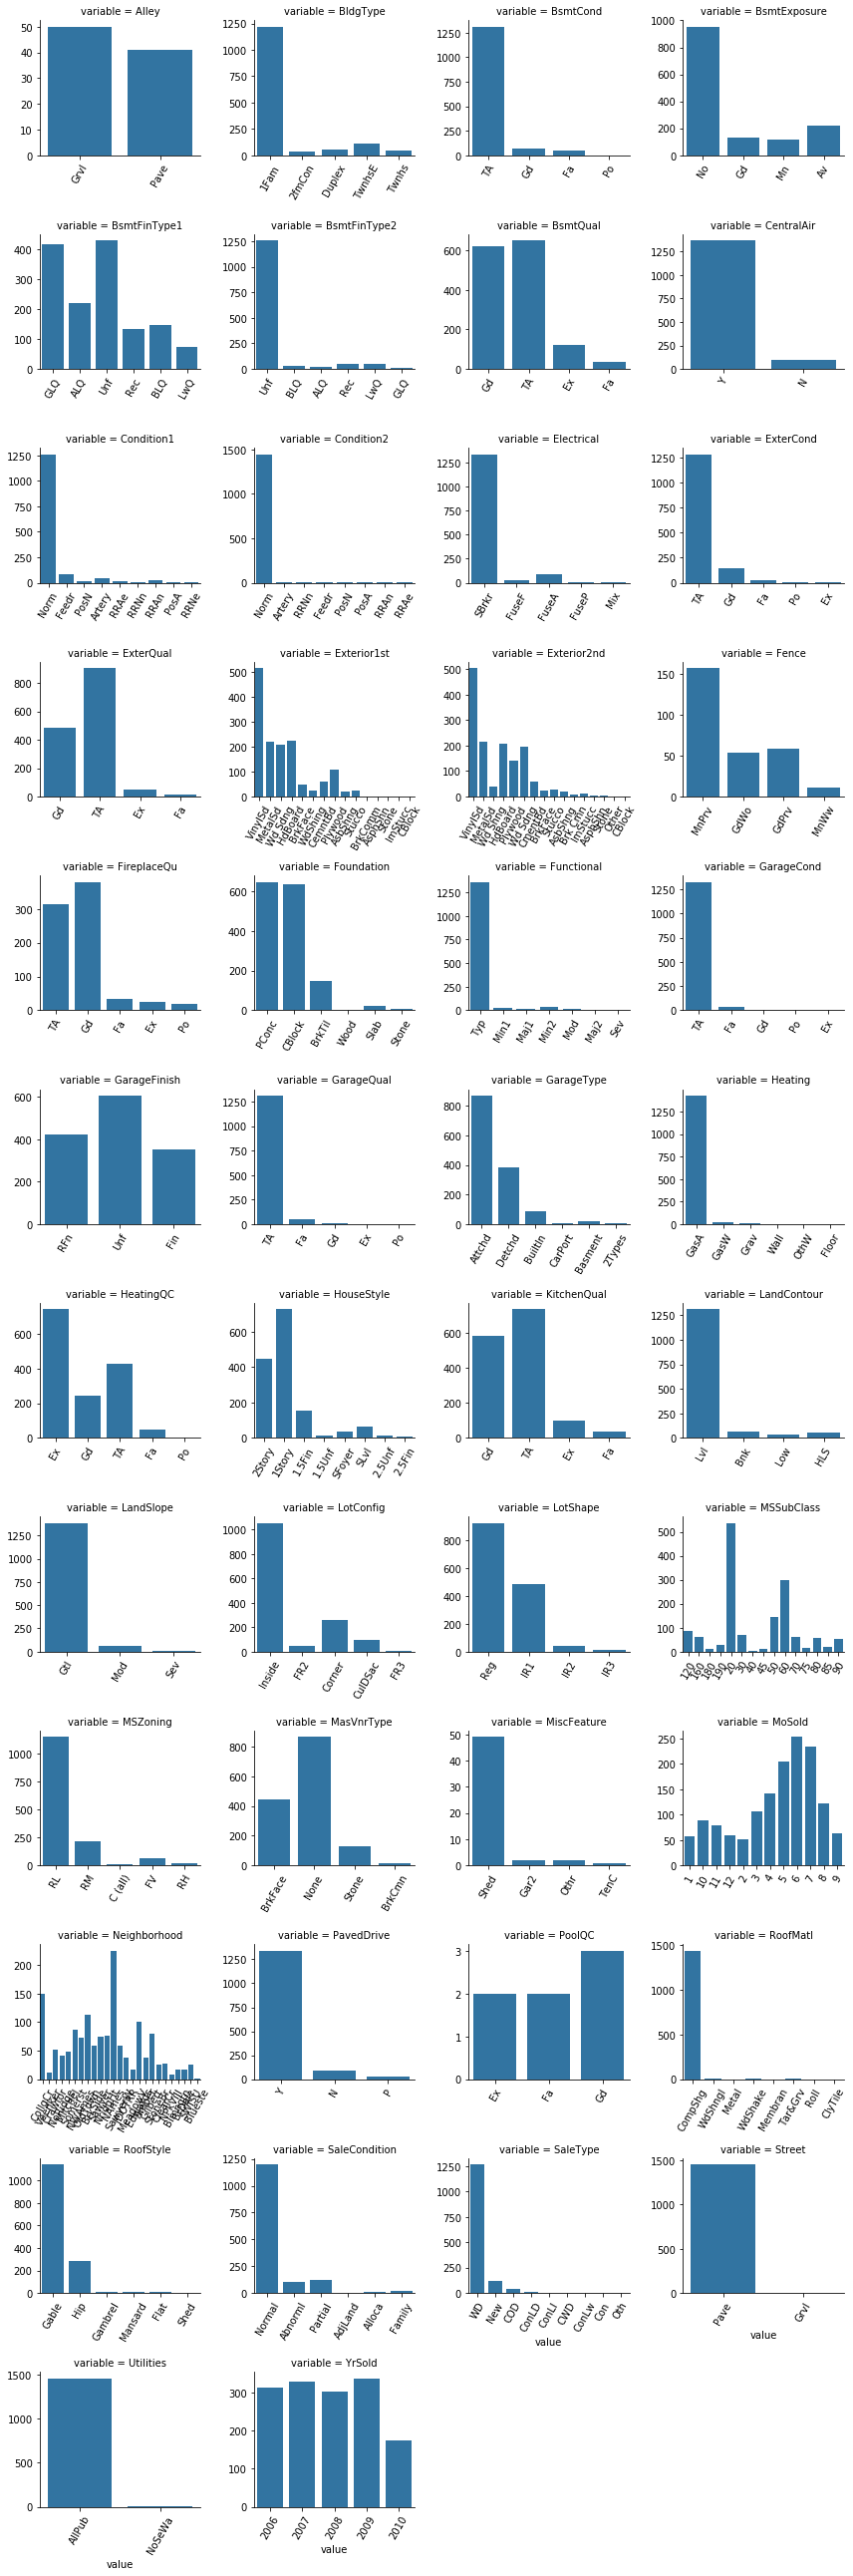

In [0]:
f = pd.melt(df_train, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
df_train.Alley.replace({'Grv1':1, 'Pave':2},inplace=True)

In [0]:
df_train['Alley'].unique()

array([nan, 'Grvl', 2], dtype=object)

In [0]:
...
Categorical column whose text/spring values to be converted to numerical values

Alley, BldgType, LotShape, LandContour, Utilities, LandSlope, ExterQual,
ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC
...

SyntaxError: ignored

In [0]:
# Lot Shape -
df_train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
df_train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True);

# Utilities
df_train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub' :4}, inplace=True)
# Land Slope
df_train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
df_train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
df_train.ExterCond.replace({'Po':1, 'FA':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
df_train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
df_train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
df_train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
df_train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ' :6}, inplace=True)
# Finished Basement 2 Rating
df_train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ' : 6}, inplace=True)
# Heating Quality and Condition
df_train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Kitchen Quality
df_train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Home functionality
df_train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
# Fireplace Quality
df_train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Garage Finish
df_train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
df_train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Garage Condition
df_train.GarageCond.replace({'Po':1, 'tra' :2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
# Paved Driveway
df_train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
df_train.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [0]:
cat_to_num_features = ['Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual',
'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']
df_train[cat_to_num_features]=df_train[cat_to_num_features] .fillna(0)

In [0]:
numeric_data = df_train.select_dtypes(include = [np.number])

categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

There are 53 numerical and 28 categorical features in the training data


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


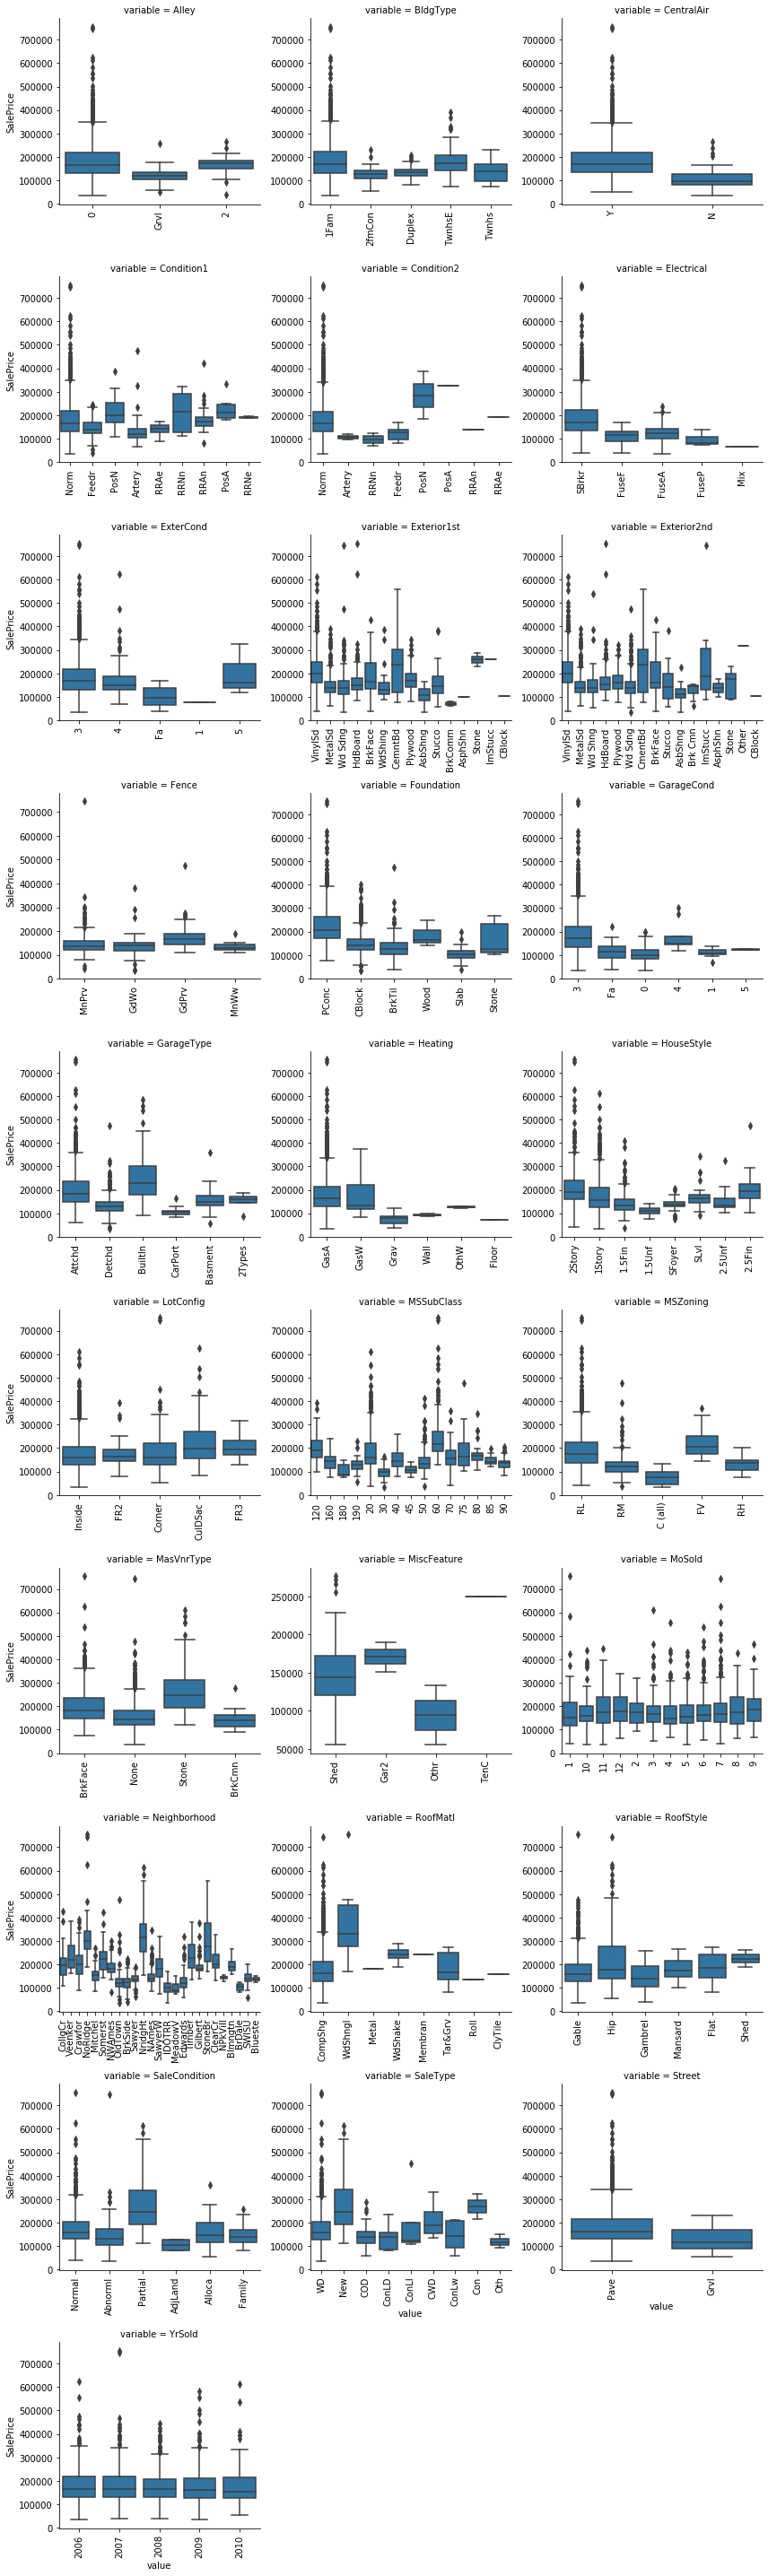

In [0]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [0]:
import scipy.stats
cat_features = categorical_data.columns
df_train[cat_features] = df_train[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
  group_prices = []

  for group in df_train[cat].unique():
    group_prices.append(df_train[df_train[cat] == group]['SalePrice'].values)

  f, p = scipy.stats.f_oneway(*group_prices)
  anova['feature'].append(cat)
  anova['f'].append(f)
  anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

In [0]:
anova

,feature,f,p
5,Neighborhood,71.784865,1.558600e-225
16,Foundation,100.253851,5.791895e-91
20,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
14,MasVnrType,84.672201,1.054025e-64
27,SaleCondition,45.578428,7.988268e-44
12,Exterior1st,18.611743,2.586089e-43
13,Exterior2nd,17.500840,4.842186e-43
26,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


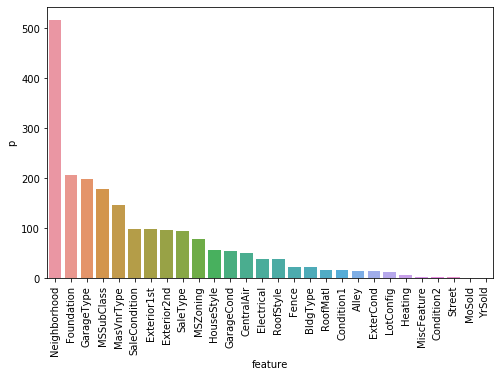

In [0]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [0]:
missing_values = (df_train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]

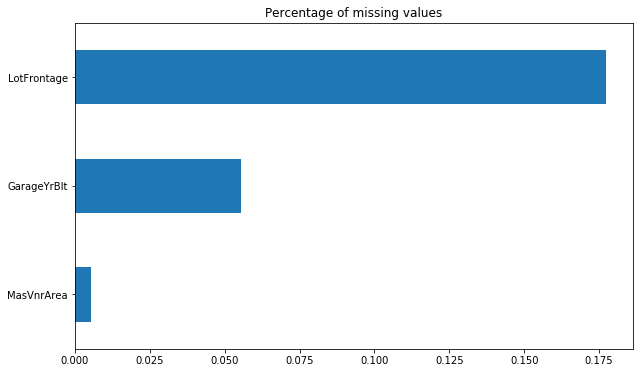

In [0]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True). \
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [0]:
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train.GarageYrBlt.fillna(0, inplace=True)
df_train.MasVnrArea.fillna(0, inplace=True)

In [0]:
df_train.MasVnrType.replace({'Missing' : 'None'}, inplace=True)
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # most common
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in df_train.MasVnrType.unique():
  # so here we set the area equal to the mean of the given veneer type
  df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0), 'MasVnrArea'] = \
      df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean()

In [0]:
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [0]:
print('Train set duplicate IDs: {}'.format(df_train.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(df_test.duplicated('Id').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


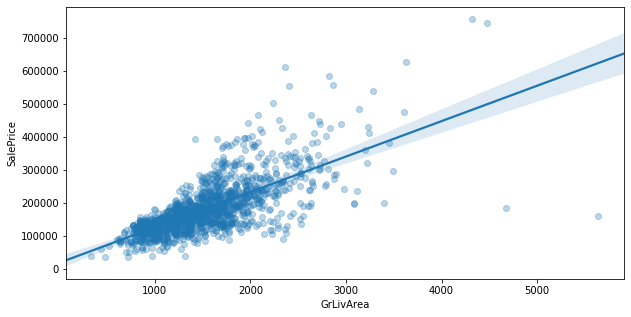

In [0]:
plt.figure(figsize=(10,5))
sns.regplot(df_train.GrLivArea, df_train.SalePrice, scatter_kws={'Alpha':0.3})
plt.show()

In [0]:
df_train.drop(df_train[df_train.GrLivArea >= 4000].index, inplace=True)


In [0]:
df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF + df_train.EnclosedPorch + \
    df_train['3SsnPorch'] + df_train['ScreenPorch']

In [0]:
df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
df_train['WasRemodeled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition != 'Partial').astype(np.int64)

In [0]:
boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodeled', 'IsNew', 'WasCompleted']

In [0]:
numeric_data = df_train.select_dtypes(include = [np.number])

categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 63 numerical and 28 categorical features in the training data


In [0]:
num_features = [f for f in num_features if f not in boolean_features]

In [0]:
df_train['TotalBathrooms'] = df_train.FullBath + .5 * df_train.HalfBath + \
    df_train.BsmtFullBath + .5 * df_train.BsmtHalfBath

In [0]:
numeric_data = df_train.select_dtypes(include = [np.number])

categorical_data = df_train.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
      format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns
num_features = [f for f in num_features if f not in boolean_features]

There are 64 numerical and 28 categorical features in the training data


In [0]:
features = num_features + ['SalePrice']
for f in features:
    df_train.loc[:,f] = np.log1p(df_train[f])

In [0]:
y = df_train['SalePrice' ]
df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)

#Get dummies one-hot encoding method

model_data = pd.get_dummies(df_train) .copy()

KeyError: ignored

In [0]:
model_data.head()

,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,0.693147,1.609438,1.609438,1.386294,2.079442,1.791759,7.602900,7.602900,5.283204,1.609438,1.609438,1.386294,0.693147,1.945910,6.561031,0.693147,0.0,5.017280,6.753438,1.791759,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.609438,2.197225,2.197225,0.000000,0.000000,7.602900,1.098612,1.098612,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,0.693147,1.609438,1.609438,1.386294,1.945910,2.197225,7.589336,7.589336,0.000000,1.386294,1.609438,1.386294,1.609438,1.791759,6.886532,0.693147,0.0,5.652489,7.141245,1.791759,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.386294,1.945910,2.197225,0.693147,1.386294,7.589336,1.098612,1.098612,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,1.098612,1.609438,1.609438,1.386294,2.079442,1.791759,7.601902,7.602401,5.093750,1.609438,1.609438,1.386294,1.098612,1.945910,6.188264,0.693147,0.0,6.075346,6.825460,1.791759,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.609438,1.945910,2.197225,0.693147,1.386294,7.601902,1.098612,1.098612,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,1.098612,1.609438,1.609438,1.386294,2.079442,1.791759,7.557995,7.586296,0.000000,1.386294,1.386294,1.609438,0.693147,1.791759,5.379897,0.693147,0.0,6.293419,6.629363,1.609438,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,1.609438,2.079442,2.197225,0.693147,1.609438,7.600402,0.693147,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,1.098612,1.609438,1.609438,1.386294,2.197225,1.791759,7.601402,7.601402,5.860786,1.609438,1.609438,1.386294,1.386294,1.945910,6.486161,0.693147,0.0,6.196444,7.044033,1.791759,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,1.609438,2.302585,2.197225,0.693147,1.386294,7.601402,1.098612,1.386294,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
  train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1019, 274)
X_val: (437, 274)
y_train: (1019,)
y_val: (437,)


In [0]:
from sklearn.preprocessing import RobustScaler, StandardScaler

#num_features.remove('Id')
#num_features.remove('SalePrice')

stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])

In [0]:
from sklearn.model_selection import cross_val_score 

def rsme(model, X, y):
  cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
  return np.sqrt(cv_scores)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha' ]

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format( 
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00885 | Test RSME: 0.00936 | alpha: 0.00006


LASSO dropped 179 of 274 features.


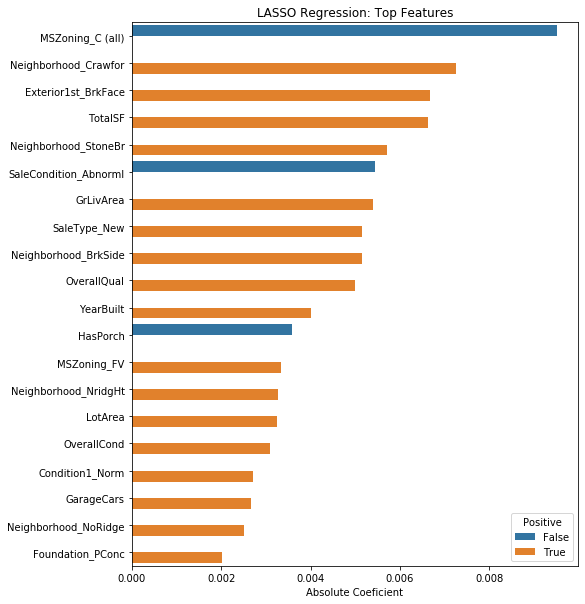

In [0]:
import seaborn as sns
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs) 
print('LASSO dropped {} of {} features.' .format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

In [0]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                        gamma=0.0,
                        learning_rate=0.05,
                        max_depth=6,
                        min_child_weight=1.5,
                        n_estimators=7200,
                        reg_alpha=0.9,
                        reg_lambda=0.6,
                        subsample=0.2,
                        seed=42,
                        silent=1)

regr.fit(X_train[top_coefs.index], y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

In [0]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred): 
  return np.sqrt(mean_squared_error(y_test, y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(X_test[top_coefs.index])

print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  0.014099754830184535
